Dataset Shape: (1118669, 34)


,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,discounted_price_inr,quantity,subtotal_inr,delivery_charges,final_amount_inr,customer_city,customer_state,customer_tier,customer_spending_tier,customer_age_group,payment_method,delivery_days,delivery_type,is_prime_member,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating
0,TXN_2015_00000001,2015-01-25,CUST_2015_00003884,PROD_000021,Samsung Galaxy S6 16GB Black,Electronics,Smartphones,Samsung,123614.29,27.91,89112.17,1,89112.17,0.0,89112.17,Mumbai,Maharashtra,Metro,Premium,46-55,Cash on Delivery,6,Standard,False,True,Republic Day Sale,5.0,Delivered,1,2015,1,0.19,True,4.7
1,TXN_2015_00000002,2015-05-01,CUST_2015_00011709,PROD_000055,OnePlus OnePlus 2 16GB White,Electronics,Smartphones,OnePlus,54731.86,0.00,54731.86,1,54731.86,0.0,54731.86,Allahabad,Uttar Pradesh,Rural,Standard,26-35,Cash on Delivery,4,Standard,False,False,NaN,4.5,Delivered,1,2015,1,0.20,True,4.1
2,TXN_2015_00000003,2015-01-24,CUST_2015_00004782,PROD_000039,Samsung Galaxy Note 5 64GB Black,Electronics,Smartphones,Samsung,97644.25,46.93,51818.26,2,103636.52,NaN,103636.52,Mumbai,Maharashtra,Metro,Premium,26-35,Cash on Delivery,4,Standard,False,True,Republic Day Sale,NaN,Delivered,1,2015,1,0.17,True,3.3
3,TXN_2015_00000004,2015-01-28,CUST_2015_00008105,PROD_000085,Motorola Moto G (3rd Gen) 16GB Black,Electronics,Smartphones,Motorola,21947.26,0.00,21947.26,1,21947.26,0.0,21947.26,Kolkata,West Bengal,Metro,Budget,36-45,Cash on Delivery,4,Standard,False,False,NaN,3.0,Delivered,1,2015,1,0.22,True,3.5
4,TXN_2015_00000005,2015-01-31,CUST_2015_00002955,PROD_000055,OnePlus OnePlus 2 16GB White,Electronics,Smartphones,OnePlus,54731.86,0.00,54731.86,2,109463.72,0.0,109463.72,Ludhiana,Punjab,Tier2,Standard,18-25,Cash on Delivery,3,Standard,False,False,NaN,4.0,Delivered,1,2015,1,0.20,True,4.1


----- DELIVERY PERFORMANCE ANALYSIS -----


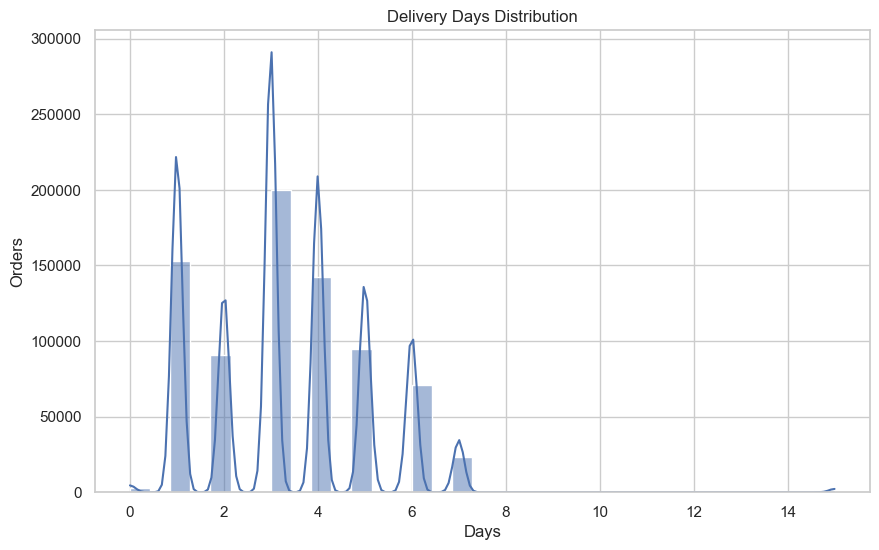

On-Time % Distribution:
on_time
True     57.276644
False    42.723356
Name: proportion, dtype: float64


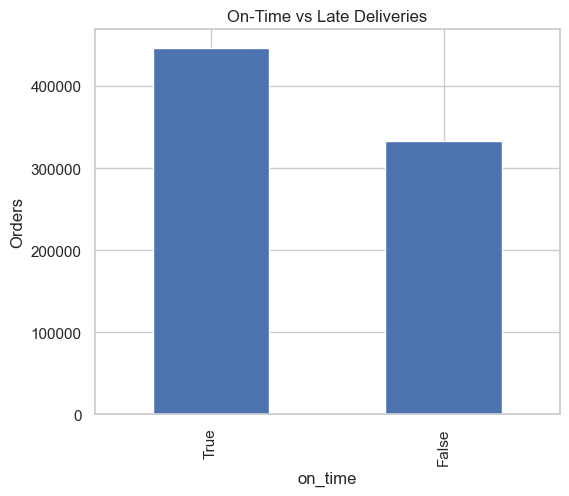

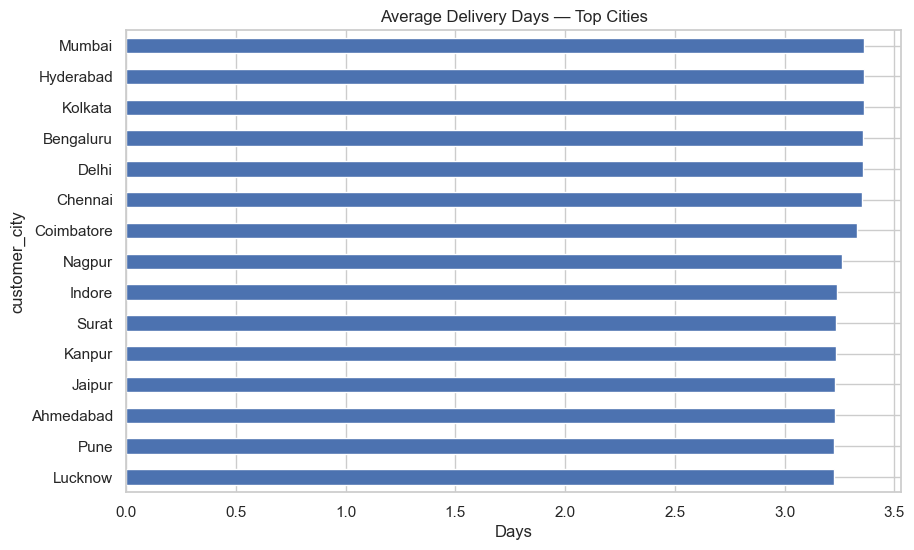

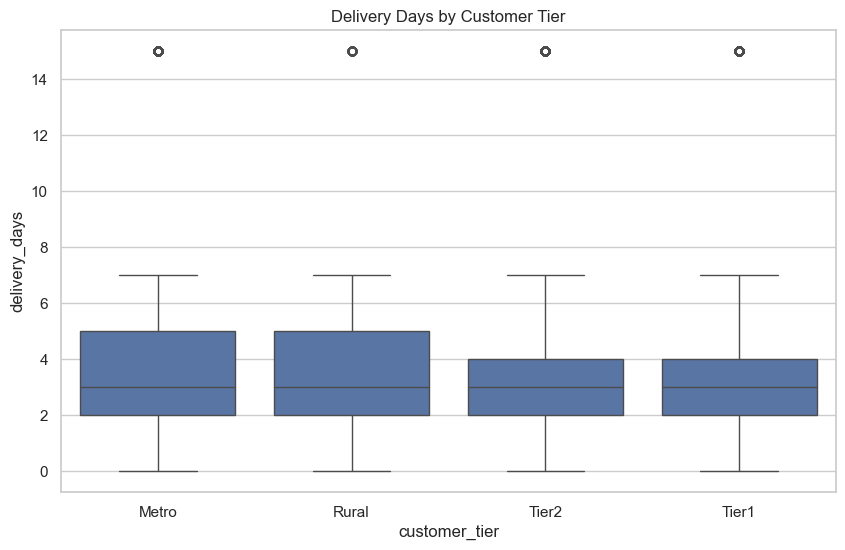

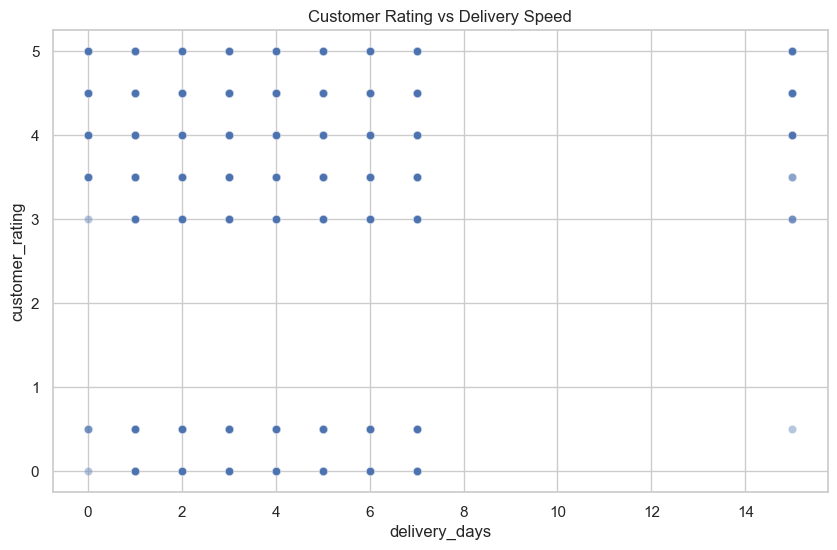

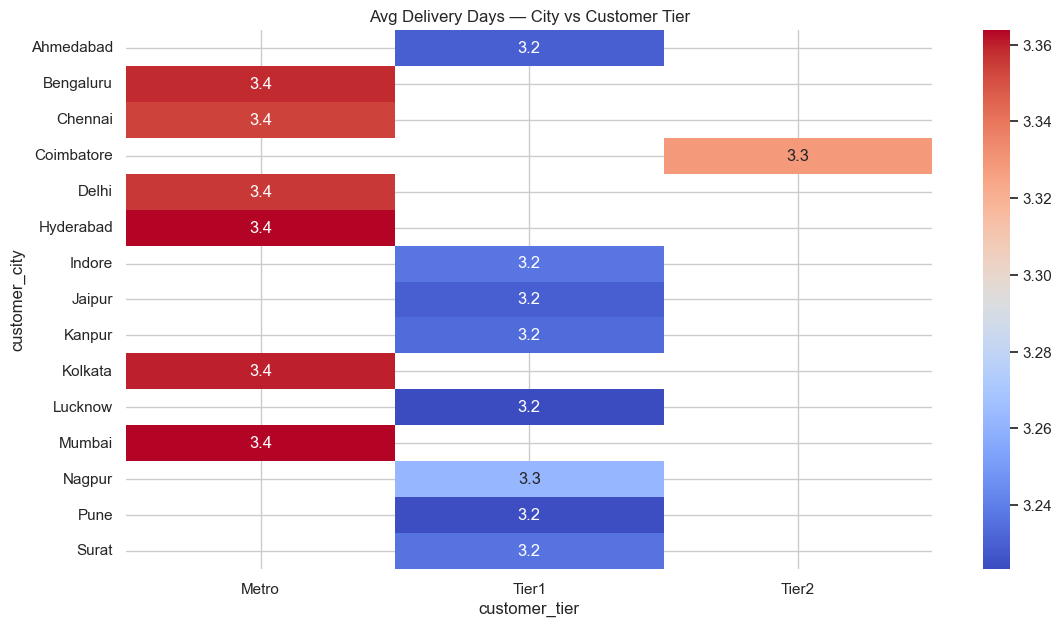

----- RETURNS & SATISFACTION ANALYSIS -----
Return Status Distribution:
return_status
Delivered    90.676626
Returned      7.005452
Cancelled     2.317922
Name: proportion, dtype: float64


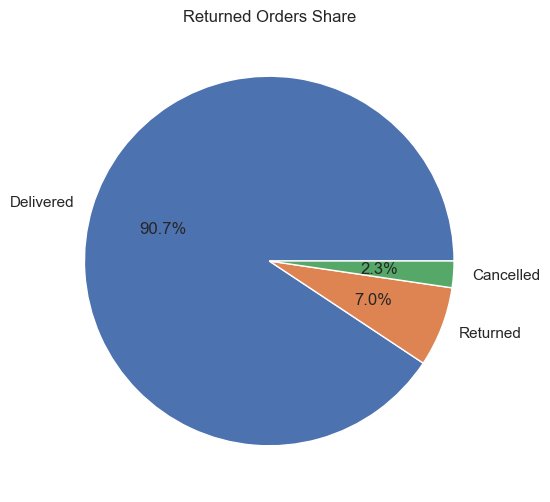

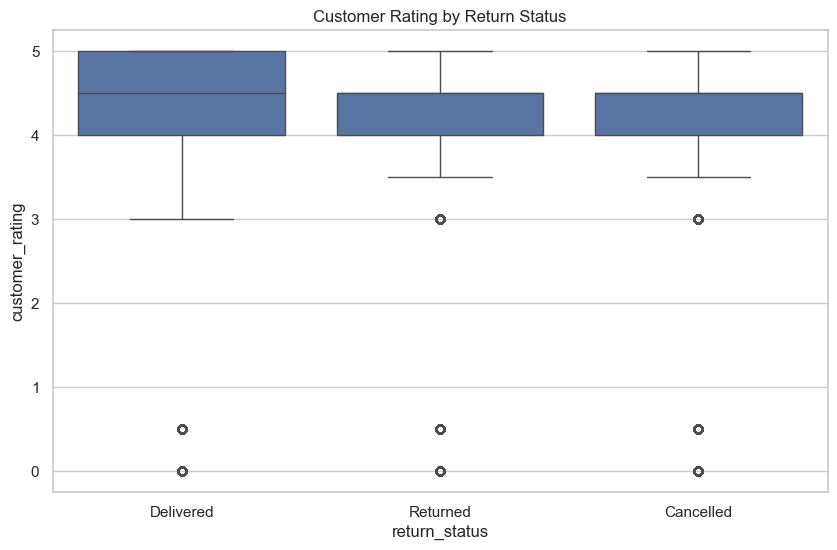

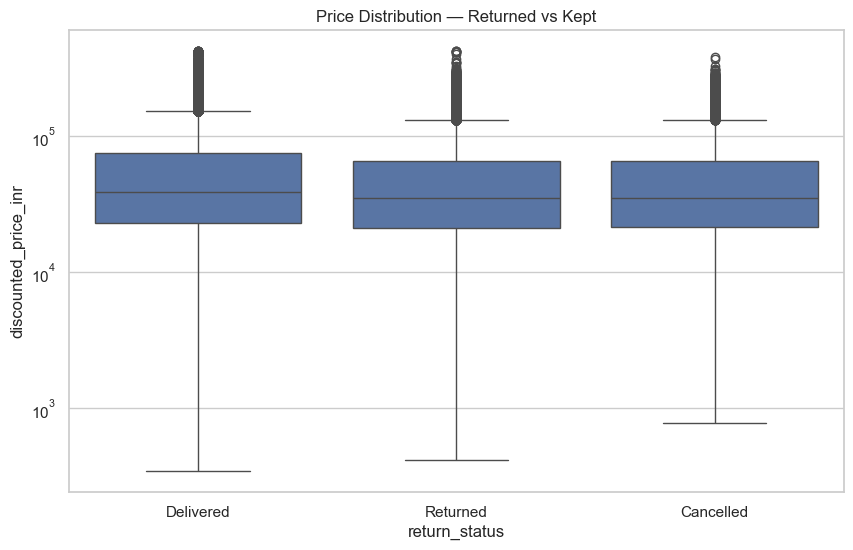

return_status,Cancelled,Delivered,Returned
category,,,
Electronics,2.317922,90.676626,7.005452


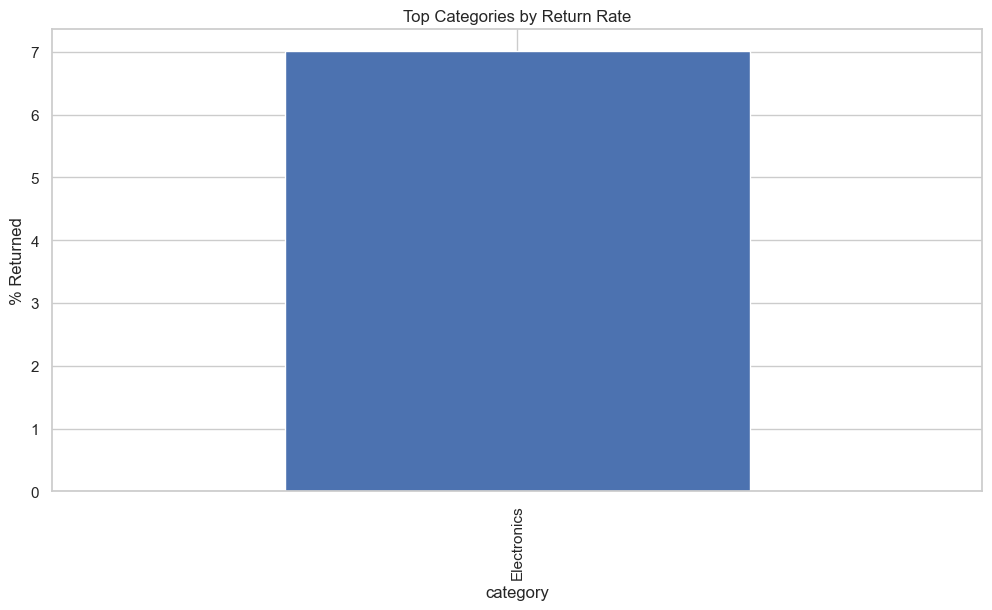

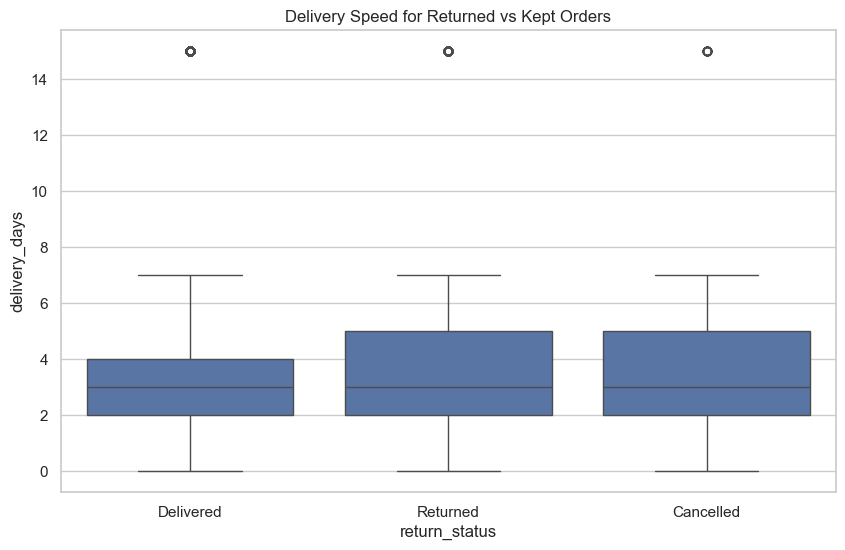

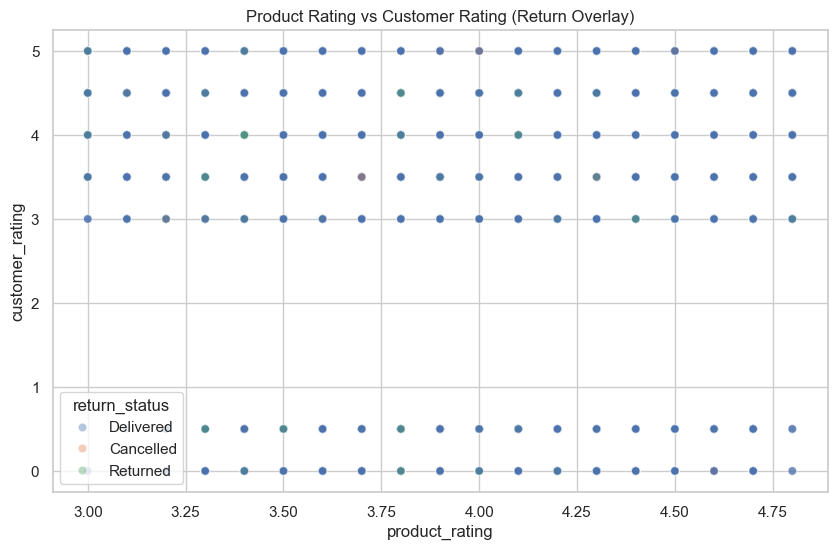

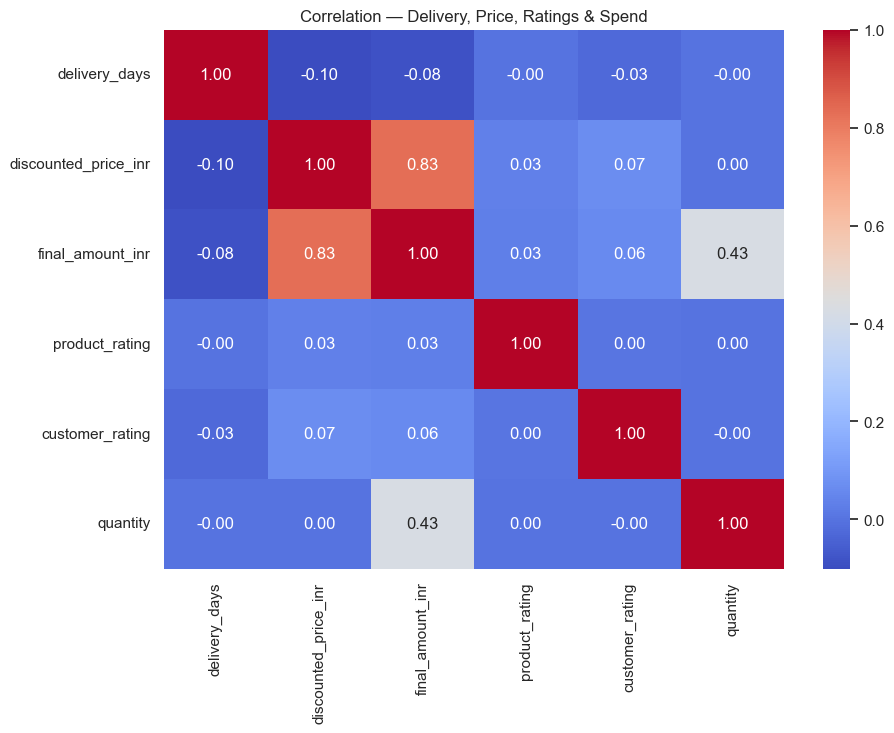

<Figure size 1300x600 with 0 Axes>

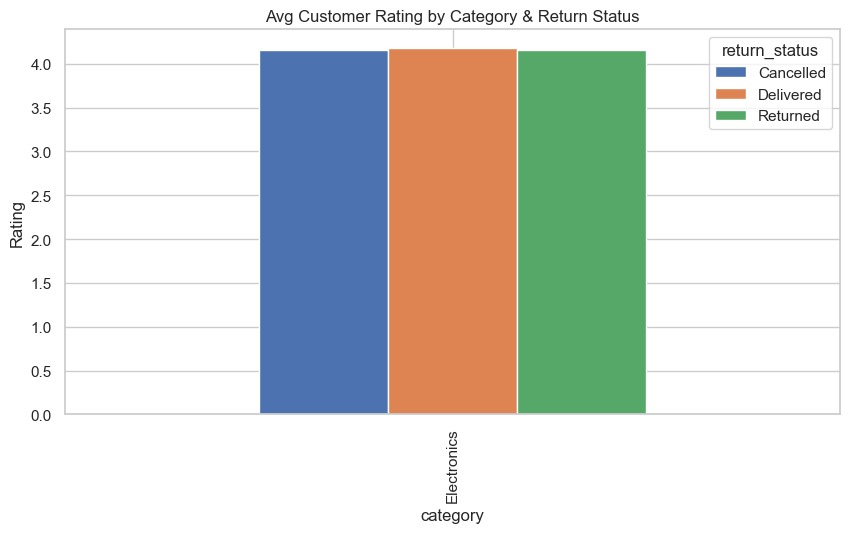

return_status,Cancelled,Delivered,Returned
is_prime_member,,,
False,2.404503,90.260676,7.334821
True,2.176940,91.353930,6.469131


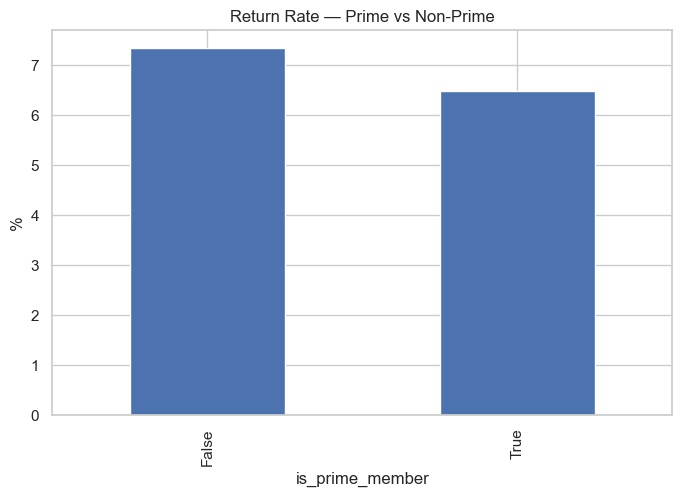

✅ EDA_10 COMPLETED SUCCESSFULLY


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# ============================================================
# LOAD MASTER DATA
# ============================================================

df = pd.read_csv("../master/amazon_india_master_2015_2025.csv")

print("Dataset Shape:", df.shape)
display(df.head())

# ============================================================
# BASIC CLEAN
# ============================================================

df["order_date"] = pd.to_datetime(df["order_date"], errors="coerce")

num_cols = [
    "delivery_days",
    "discounted_price_inr",
    "final_amount_inr",
    "product_rating",
    "customer_rating",
    "quantity",
]

df[num_cols] = df[num_cols].apply(pd.to_numeric, errors="coerce")

# Remove rows missing core fields
df = df.dropna(
    subset=[
        "delivery_days",
        "customer_rating",
        "return_status",
        "customer_city",
        "customer_tier",
    ]
)

# ============================================================
# QUESTION 11 : DELIVERY PERFORMANCE
# ============================================================

print("----- DELIVERY PERFORMANCE ANALYSIS -----")

# ------------------------------------------------------------
# Delivery Days Distribution
# ------------------------------------------------------------

plt.figure(figsize=(10,6))
sns.histplot(df["delivery_days"], bins=35, kde=True)
plt.title("Delivery Days Distribution")
plt.xlabel("Days")
plt.ylabel("Orders")
plt.show()

# ------------------------------------------------------------
# On-Time Proxy (<= Median Days)
# ------------------------------------------------------------

median_days = df["delivery_days"].median()
df["on_time"] = df["delivery_days"] <= median_days

print("On-Time % Distribution:")
print(df["on_time"].value_counts(normalize=True) * 100)

plt.figure(figsize=(6,5))
df["on_time"].value_counts().plot(kind="bar")
plt.title("On-Time vs Late Deliveries")
plt.ylabel("Orders")
plt.show()

# ------------------------------------------------------------
# Top Cities by Avg Delivery Time
# ------------------------------------------------------------

top_cities = df["customer_city"].value_counts().head(15).index

city_perf = (
    df[df["customer_city"].isin(top_cities)]
      .groupby("customer_city")["delivery_days"]
      .mean()
      .sort_values()
)

plt.figure(figsize=(10,6))
city_perf.plot(kind="barh")
plt.title("Average Delivery Days — Top Cities")
plt.xlabel("Days")
plt.show()

# ------------------------------------------------------------
# Customer Tier vs Delivery Speed
# ------------------------------------------------------------

plt.figure(figsize=(10,6))
sns.boxplot(
    data=df,
    x="customer_tier",
    y="delivery_days"
)
plt.title("Delivery Days by Customer Tier")
plt.show()

# ------------------------------------------------------------
# Rating vs Delivery Speed
# ------------------------------------------------------------

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df.sample(20000, random_state=42),
    x="delivery_days",
    y="customer_rating",
    alpha=0.4
)
plt.title("Customer Rating vs Delivery Speed")
plt.show()

# ------------------------------------------------------------
# City x Tier Heatmap
# ------------------------------------------------------------

city_tier = (
    df[df["customer_city"].isin(top_cities)]
    .pivot_table(
        values="delivery_days",
        index="customer_city",
        columns="customer_tier",
        aggfunc="mean"
    )
)

plt.figure(figsize=(13,7))
sns.heatmap(city_tier, annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Avg Delivery Days — City vs Customer Tier")
plt.show()

# ============================================================
# QUESTION 12 : RETURNS & CUSTOMER SATISFACTION
# ============================================================

print("----- RETURNS & SATISFACTION ANALYSIS -----")

# ------------------------------------------------------------
# Overall Return Rate
# ------------------------------------------------------------

print("Return Status Distribution:")
print(df["return_status"].value_counts(normalize=True) * 100)

plt.figure(figsize=(6,6))
df["return_status"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%"
)
plt.title("Returned Orders Share")
plt.ylabel("")
plt.show()

# ------------------------------------------------------------
# Customer Rating vs Return Status
# ------------------------------------------------------------

plt.figure(figsize=(10,6))
sns.boxplot(
    data=df,
    x="return_status",
    y="customer_rating"
)
plt.title("Customer Rating by Return Status")
plt.show()

# ------------------------------------------------------------
# Price vs Return Status
# ------------------------------------------------------------

plt.figure(figsize=(10,6))
sns.boxplot(
    data=df,
    x="return_status",
    y="discounted_price_inr"
)
plt.yscale("log")
plt.title("Price Distribution — Returned vs Kept")
plt.show()

# ------------------------------------------------------------
# Category-wise Return %
# ------------------------------------------------------------

cat_return = pd.crosstab(
    df["category"],
    df["return_status"],
    normalize="index"
) * 100

display(cat_return.sort_values(by="Returned", ascending=False).head(15))

plt.figure(figsize=(12,6))
cat_return["Returned"].sort_values(ascending=False).head(15).plot(kind="bar")
plt.title("Top Categories by Return Rate")
plt.ylabel("% Returned")
plt.show()

# ------------------------------------------------------------
# Delivery Speed vs Return
# ------------------------------------------------------------

plt.figure(figsize=(10,6))
sns.boxplot(
    data=df,
    x="return_status",
    y="delivery_days"
)
plt.title("Delivery Speed for Returned vs Kept Orders")
plt.show()

# ------------------------------------------------------------
# Product Rating vs Customer Rating
# ------------------------------------------------------------

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df.sample(20000, random_state=42),
    x="product_rating",
    y="customer_rating",
    hue="return_status",
    alpha=0.4
)
plt.title("Product Rating vs Customer Rating (Return Overlay)")
plt.show()

# ------------------------------------------------------------
# Correlation Heatmap
# ------------------------------------------------------------

corr_cols = [
    "delivery_days",
    "discounted_price_inr",
    "final_amount_inr",
    "product_rating",
    "customer_rating",
    "quantity",
]

plt.figure(figsize=(10,7))
sns.heatmap(
    df[corr_cols].corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Correlation — Delivery, Price, Ratings & Spend")
plt.show()

# ------------------------------------------------------------
# Category x Rating x Return
# ------------------------------------------------------------

cat_rating = (
    df.groupby(["category","return_status"])["customer_rating"]
      .mean()
      .unstack()
)

plt.figure(figsize=(13,6))
cat_rating.plot(kind="bar")
plt.title("Avg Customer Rating by Category & Return Status")
plt.ylabel("Rating")
plt.show()

# ------------------------------------------------------------
# Prime vs Return Rate
# ------------------------------------------------------------

prime_return = pd.crosstab(
    df["is_prime_member"],
    df["return_status"],
    normalize="index"
) * 100

display(prime_return)

plt.figure(figsize=(8,5))
prime_return["Returned"].plot(kind="bar")
plt.title("Return Rate — Prime vs Non-Prime")
plt.ylabel("%")
plt.show()

print("✅ EDA_10 COMPLETED SUCCESSFULLY")
